In [8]:
import pandas as pd
import cloupy as cl
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

In [23]:
df = pd.read_excel('df_total_correct.xlsx')
df

,Unnamed: 0,Day,Dot,latitude,longitude,chamber_p,chamber_p_t,chamber_t,soil_t,soilp_c,soilp_m,soilp_t,ch4,co2,h2o,err
0,3,18day.json,Dot_1,44.578920,37.973490,100.101505,35.591029,26.751230,9999,0.005000,0.061000,27.500000,1988.377048,488.091533,25.949443,1.295238
1,30,22day.json,Dot_1,44.578920,37.973490,100.896390,37.442655,28.511265,9999,0.003000,0.035981,27.500000,2021.398190,451.541010,21.135203,0.000000
2,49,4day.json,Dot_1,44.578870,37.973490,100.239752,31.906071,25.810817,9999,0.011000,0.100000,26.280000,1995.998667,482.014705,24.841982,0.000000
3,66,8day.json,Dot_1,44.578860,37.973560,100.826048,37.774327,29.284392,9999,0.001000,0.004924,28.605714,2046.664667,466.105857,16.833802,0.000000
4,86,8day.json,Dot_10,44.578535,37.972178,101.173048,43.055755,37.085275,9999,0.005000,0.056000,37.119048,1995.894381,441.951029,12.440330,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,79,8day.json,Dot_8,44.579250,37.972200,100.632438,43.560219,36.349922,9999,0.023000,0.170400,33.586667,2008.229143,459.678171,15.610915,0.000000
57,14,18day.json,Dot_9,44.579020,37.971400,99.976081,44.260435,31.723295,9999,0.031000,0.206000,35.103846,1986.123173,461.878212,28.326564,0.000000
58,39,22day.json,Dot_9,44.579030,37.971400,100.805019,42.580602,31.009529,9999,0.008000,0.091743,34.268571,2022.495524,434.940229,19.093693,0.000000
59,55,4day.json,Dot_9,44.579030,37.971370,100.124238,37.559560,28.215607,9999,0.010438,0.097248,28.600000,1992.503429,464.168676,24.473872,0.000000


In [19]:
all_day = pd.read_excel('export_day_all.xlsx', skiprows = [1])
all_day.rename(columns={"LATITUDE": "latitude", "LONGITUDE": "longitude"}, inplace=True)

In [30]:
df_merge.sample(15)

,Unnamed: 0,Day,Dot,latitude,longitude,chamber_p,chamber_p_t,chamber_t,soil_t,soilp_c,...,co2,h2o,err,day,DOY initial_value,TA initial_value,PA initial_value,VOLUME_TOTAL,FCH4_DRY,FCO2_DRY
57,40,22day.json,Dot_8,44.57925,37.97220,100.762905,43.217660,35.175070,9999,0.017162,...,446.337276,18.633510,0.0,4.0,199.58123,34.15450,100.76,7471.06,-0.60601,5.01682
50,77,8day.json,Dot_6,44.57910,37.97083,100.671305,43.522104,32.969187,9999,0.002552,...,449.464886,15.509461,0.0,2.0,170.62478,32.24268,100.67,7153.06,-0.72322,2.44631
20,27,18day.json,Dot_15,44.57753,37.97098,100.290048,44.484282,34.895163,9999,0.009000,...,477.824333,25.549611,0.0,3.0,190.69736,32.94535,100.29,7153.06,-1.08199,4.04484
31,71,8day.json,Dot_2,44.57935,37.97309,100.727848,43.992123,30.422260,9999,0.016000,...,487.537400,18.540569,0.0,2.0,170.58653,30.50525,100.73,7153.06,-0.76580,3.53859
24,18,18day.json,Dot_16,44.57804,37.97026,100.196314,42.935634,31.189697,9999,0.020000,...,458.758981,26.071446,0.0,3.0,190.64706,29.94028,100.20,6994.06,-0.95356,4.81174
56,40,22day.json,Dot_8,44.57925,37.97220,100.762905,43.217660,35.175070,9999,0.017162,...,446.337276,18.633510,0.0,2.0,170.63522,35.69821,100.63,7471.06,-0.72857,4.34123
13,20,18day.json,Dot_13,44.57824,37.97086,100.112010,44.241626,35.603884,9999,0.012000,...,469.769514,28.358990,0.0,3.0,190.66023,34.64447,100.12,7471.06,-0.77601,6.46308
5,24,18day.json,Dot_11,44.57801,37.97255,100.214810,43.934072,29.738597,9999,0.015000,...,448.256971,26.771142,0.0,3.0,190.68003,28.65068,100.22,7312.06,-1.39355,2.88524
32,9,18day.json,Dot_3,44.57979,37.97214,99.850487,44.003014,30.172354,9999,0.023000,...,465.820857,28.308668,0.0,3.0,190.60096,29.61473,99.85,7153.06,-0.94392,5.70255
3,66,8day.json,Dot_1,44.57886,37.97356,100.826048,37.774327,29.284392,9999,0.001000,...,466.105857,16.833802,0.0,2.0,170.55153,29.36833,100.83,7153.06,-0.36508,3.28305


In [26]:
df_merge = pd.merge(df, all_day, how = 'left')

In [44]:
df_merge

,Unnamed: 0,Day,Dot,latitude,longitude,chamber_p,chamber_p_t,chamber_t,soil_t,soilp_c,...,co2,h2o,err,day,DOY initial_value,TA initial_value,PA initial_value,VOLUME_TOTAL,FCH4_DRY,FCO2_DRY
0,3,18day.json,Dot_1,44.578920,37.973490,100.101505,35.591029,26.751230,9999,0.005000,...,488.091533,25.949443,1.295238,3.0,190.56087,26.58927,100.11,6994.06,-0.59544,6.15226
1,30,22day.json,Dot_1,44.578920,37.973490,100.896390,37.442655,28.511265,9999,0.003000,...,451.541010,21.135203,0.000000,3.0,190.56087,26.58927,100.11,6994.06,-0.59544,6.15226
2,49,4day.json,Dot_1,44.578870,37.973490,100.239752,31.906071,25.810817,9999,0.011000,...,482.014705,24.841982,0.000000,1.0,160.51406,25.49984,100.24,6835.06,-0.44037,5.11805
3,66,8day.json,Dot_1,44.578860,37.973560,100.826048,37.774327,29.284392,9999,0.001000,...,466.105857,16.833802,0.000000,2.0,170.55153,29.36833,100.83,7153.06,-0.36508,3.28305
4,86,8day.json,Dot_10,44.578535,37.972178,101.173048,43.055755,37.085275,9999,0.005000,...,441.951029,12.440330,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,79,8day.json,Dot_8,44.579250,37.972200,100.632438,43.560219,36.349922,9999,0.023000,...,459.678171,15.610915,0.000000,4.0,199.58123,34.15450,100.76,7471.06,-0.60601,5.01682
61,14,18day.json,Dot_9,44.579020,37.971400,99.976081,44.260435,31.723295,9999,0.031000,...,461.878212,28.326564,0.000000,3.0,190.62573,30.61937,99.98,7153.06,-0.89660,4.87106
62,39,22day.json,Dot_9,44.579030,37.971400,100.805019,42.580602,31.009529,9999,0.008000,...,434.940229,19.093693,0.000000,4.0,199.57637,30.35580,100.81,7312.06,-0.61040,0.99352
63,55,4day.json,Dot_9,44.579030,37.971370,100.124238,37.559560,28.215607,9999,0.010438,...,464.168676,24.473872,0.000000,1.0,160.54998,27.22347,100.11,6994.06,-0.81095,2.61163


In [46]:
df_merge['Dot'][df_merge.FCH4_DRY.isna() == True]

4     Dot_10
52     Dot_7
Name: Dot, dtype: object

In [41]:
df_merge.FCH4_DRY.isna().value_counts()

False    63
True      2
Name: FCH4_DRY, dtype: int64

In [49]:
df_merge.describe()

,Unnamed: 0,latitude,longitude,chamber_p,chamber_p_t,chamber_t,soil_t,soilp_c,soilp_m,soilp_t,...,co2,h2o,err,day,DOY initial_value,TA initial_value,PA initial_value,VOLUME_TOTAL,FCH4_DRY,FCO2_DRY
count,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.0,65.000000,65.000000,65.000000,...,65.000000,65.000000,65.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000
mean,47.246154,44.578773,37.971813,100.507279,41.708068,32.415532,9999.0,0.012811,0.111021,33.313338,...,459.638314,21.214422,0.119560,2.492063,180.364584,31.178661,100.465556,7115.202857,-0.824426,3.976919
std,23.141569,0.000793,0.000852,0.396349,3.391768,3.652876,0.0,0.007678,0.049430,3.921930,...,17.403986,4.834546,0.816715,1.119807,15.570793,3.360366,0.391036,282.289879,0.245578,2.007154
min,3.000000,44.577020,37.970260,99.815961,31.906071,25.737369,9999.0,0.000000,0.000000,26.247619,...,430.946990,12.206890,0.000000,1.000000,160.514060,25.000600,99.820000,6040.060000,-1.476700,0.680050
25%,32.000000,44.578080,37.971370,100.129733,38.657699,29.622171,9999.0,0.008000,0.081886,31.020000,...,448.256971,17.129807,0.000000,1.500000,165.582525,28.696350,100.110000,6994.060000,-0.945305,2.486860
50%,47.000000,44.579020,37.971610,100.550971,43.053632,31.723295,9999.0,0.012000,0.109714,33.586667,...,458.758981,20.924054,0.000000,3.000000,190.560870,30.633790,100.520000,7153.060000,-0.733720,4.044840
75%,63.000000,44.579250,37.972200,100.809152,44.197939,35.565138,9999.0,0.017000,0.147886,36.320952,...,469.769514,25.549611,0.000000,3.000000,190.694200,34.121350,100.760000,7312.060000,-0.649890,5.067435
max,87.000000,44.580090,37.973560,101.309486,46.396627,39.390320,9999.0,0.037638,0.244495,40.276190,...,505.284981,29.191231,6.476190,4.000000,199.637590,39.147790,101.300000,7471.060000,-0.359320,11.151440


In [51]:
df_merge_correct = df_merge[df_merge['FCO2_DRY'] < 10]

In [53]:
df_merge_correct.describe()

,Unnamed: 0,latitude,longitude,chamber_p,chamber_p_t,chamber_t,soil_t,soilp_c,soilp_m,soilp_t,...,co2,h2o,err,day,DOY initial_value,TA initial_value,PA initial_value,VOLUME_TOTAL,FCH4_DRY,FCO2_DRY
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.0,62.000000,62.000000,62.000000,...,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000
mean,47.274194,44.578795,37.971796,100.494205,41.628972,32.209208,9999.0,0.012866,0.110956,33.173400,...,459.703176,21.296318,0.125346,2.483871,180.198341,31.143081,100.469839,7114.592258,-0.823974,3.861201
std,22.868956,0.000804,0.000862,0.390746,3.438247,3.608837,0.0,0.007782,0.049801,3.952802,...,17.053046,4.792130,0.836117,1.127044,15.641436,3.375813,0.392735,284.552379,0.247557,1.799242
min,3.000000,44.577020,37.970260,99.815961,31.906071,25.737369,9999.0,0.000000,0.000000,26.247619,...,430.946990,12.206890,0.000000,1.000000,160.514060,25.000600,99.820000,6040.060000,-1.476700,0.680050
25%,33.500000,44.578083,37.971130,100.125612,38.572055,29.469702,9999.0,0.008000,0.082560,30.756429,...,449.284936,17.160071,0.000000,1.250000,163.098023,28.673515,100.110000,6994.060000,-0.945998,2.466585
50%,48.000000,44.579030,37.971590,100.544264,43.032242,31.472921,9999.0,0.011995,0.108814,33.400000,...,458.805200,21.029629,0.000000,2.500000,180.632055,30.626580,100.520000,7153.060000,-0.732855,3.934690
75%,62.750000,44.579325,37.972200,100.798848,44.192710,35.549855,9999.0,0.017000,0.147793,36.228571,...,468.887967,25.627209,0.000000,3.000000,190.695780,34.137925,100.760000,7312.060000,-0.649890,5.016820
max,87.000000,44.580090,37.973560,101.309486,46.396627,39.390320,9999.0,0.037638,0.244495,40.276190,...,505.284981,29.191231,6.476190,4.000000,199.637590,39.147790,101.300000,7471.060000,-0.359320,8.109570


In [55]:
# df_merge_correct
df = df_merge_correct.groupby(by="Dot").mean()
df.drop(columns=['Unnamed: 0'], inplace = True)
df.reset_index(inplace=True)
df['Dot'] = df['Dot'].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype(int)
df.sort_values(by=['Dot'], inplace=True)

In [60]:
df[['FCH4_DRY', 'FCO2_DRY']].describe()

,FCH4_DRY,FCO2_DRY
count,15.000000,15.000000
mean,-0.835378,3.850159
std,0.246064,1.289941
min,-1.350167,2.130385
25%,-0.991542,2.697138
50%,-0.730665,3.527843
75%,-0.667344,5.000687
max,-0.499082,5.975325


In [61]:
df.to_excel('gas_flows.xlsx')

In [47]:
# df_merge['Dot'].value_counts()

In [6]:
df = pd.read_excel('df_total_correct.xlsx')
df = df.groupby(by="Dot").mean()
df.drop(columns=['Unnamed: 0'], inplace = True)
df.reset_index(inplace=True)
df['Dot'] = df['Dot'].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype(int)
df.sort_values(by=['Dot'], inplace=True)
df

,Dot,latitude,longitude,chamber_p,chamber_p_t,chamber_t,soil_t,soilp_c,soilp_m,soilp_t,ch4,co2,h2o,err
0,1,44.578892,37.973507,100.515924,35.678520,27.589426,9999.0,0.005000,0.050476,27.471429,2013.109643,471.938276,22.190107,0.323810
8,2,44.579172,37.973155,100.414531,41.690700,29.677498,9999.0,0.019807,0.153314,32.879048,2002.724571,480.851279,24.013034,0.000000
9,3,44.579778,37.972122,100.345971,41.127518,29.416013,9999.0,0.020528,0.162413,30.691619,2005.336952,467.922745,22.442795,0.000000
10,4,44.580047,37.971510,100.226584,40.336947,28.862218,9999.0,0.007562,0.073495,29.947143,2002.574143,447.907155,21.006345,0.000000
11,5,44.579575,37.971497,100.266129,41.164208,33.866318,9999.0,0.015898,0.128557,31.339113,2001.837969,455.739324,21.215942,0.000000
12,6,44.579102,37.970840,100.377405,42.065673,31.192630,9999.0,0.009221,0.089807,33.297143,1999.718881,462.893576,22.165510,0.000000
13,7,44.578535,37.972705,100.556407,41.616012,36.222452,9999.0,0.016507,0.141043,34.567619,2007.010119,466.074657,23.026714,1.619048
14,8,44.579208,37.972178,100.368810,42.224560,33.703434,9999.0,0.015076,0.116752,32.887857,2001.353340,462.431107,21.388818,0.000000
15,9,44.579028,37.971398,100.397437,41.866676,30.574341,9999.0,0.012895,0.106962,32.843104,2001.792174,449.723962,21.701896,0.000000
1,10,44.578535,37.972178,101.173048,43.055755,37.085275,9999.0,0.005000,0.056000,37.119048,1995.894381,441.951029,12.440330,0.000000


In [7]:
df.to_excel('gas_for_arcgis.xlsx')

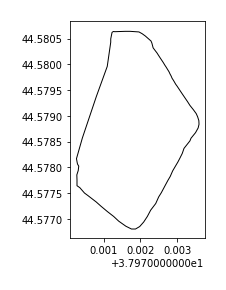

In [4]:
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.longitude, df.latitude))
bound = gpd.read_file('Gel_bound.shp')
ax = bound.plot(color='white', edgecolor='black')
# gdf.plot(ax=ax, color='red')

# for x, y, label in zip(df.longitude, df.latitude, df.Dot): # Номера точек
#     ax.annotate(label, xy=(x, y), xytext=(3, 3), textcoords="offset points")

# CH4

In [4]:
df_clean =  df.iloc[:, [10, 2, 1]]
df_clean = df_clean.to_numpy()

In [5]:
df_clean

array([[2013.10964286,   37.9735075 ,   44.5788925 ],
       [2002.72457143,   37.973155  ,   44.5791725 ],
       [2005.33695238,   37.972122  ,   44.579778  ],
       [2002.57414286,   37.97151   ,   44.5800475 ],
       [2001.83796945,   37.9714975 ,   44.579575  ],
       [1999.71888095,   37.97084   ,   44.5791025 ],
       [2007.01011905,   37.972705  ,   44.578535  ],
       [2001.35334043,   37.9721775 ,   44.5792075 ],
       [2001.79217422,   37.9713975 ,   44.5790275 ],
       [1995.89438095,   37.9721775 ,   44.578535  ],
       [1997.11911905,   37.97256   ,   44.57808   ],
       [2007.25388095,   37.971585  ,   44.57794   ],
       [2000.86990476,   37.9708625 ,   44.5782375 ],
       [1996.7892381 ,   37.97169667,   44.5771    ],
       [1999.09428571,   37.9710075 ,   44.5776125 ],
       [1999.3592381 ,   37.97033   ,   44.5780325 ]])

In [6]:
Long = df_clean[:,1]; Lat = df_clean[:,2]; Elev = df_clean[:,0]; #Variables
pts=1000000; #Input the desired number of points here

Text(0, 0.5, 'Latitude [°]')

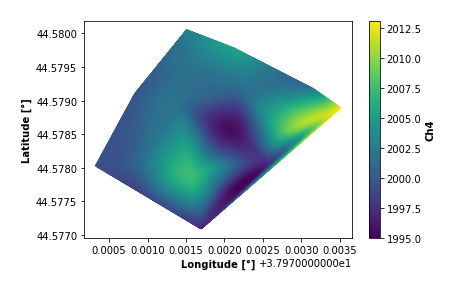

In [12]:
[x,y]=np.meshgrid(np.linspace(np.min(Long),np.max(Long),1000),np.linspace(np.min(Lat),np.max(Lat),1000));
z = griddata((Long, Lat), Elev, (x, y), method='cubic'); # nearest, cubic
x = np.matrix.flatten(x); #Gridded longitude
y = np.matrix.flatten(y); #Gridded latitude
z = np.matrix.flatten(z); #Gridded elevation

plt.scatter(x,y,1,z)
plt.colorbar(label='Ch4')
plt.xlabel('Longitude [°]')
plt.ylabel('Latitude [°]')

In [16]:
import plotly.express as px
fig = px.density_mapbox(df, lat='latitude', lon='longitude', z='ch4', radius=30,
#                         center=dict(lat=0, lon=180), zoom=0,
                        mapbox_style="stamen-terrain")
fig.show()

In [17]:
import pykrige.kriging_tools as kt
from pykrige.ok import OrdinaryKriging

In [19]:
x = df_clean[:,1]; y = df_clean[:,2]; phi = df_clean[:,0];

Plotting Enabled

Adjusting data for anisotropy...
Initializing variogram model...
Coordinates type: 'euclidean' 

Using 'gaussian' Variogram Model
Partial Sill: 29.12719471302416
Full Sill: 39.01644273152787
Range: 0.0031690851621964783
Nugget: 9.889248018503707 



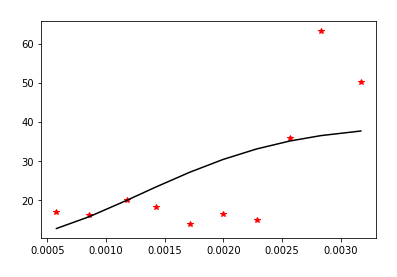

Calculating statistics on variogram model fit...


In [20]:
OK = OrdinaryKriging(
    x, 
    y, 
    phi, 
    variogram_model='gaussian',
    verbose=True,
    enable_plotting=True,
    nlags=10,
)



In [47]:
gridx = np.arange(np.min(x),np.max(x), 10, dtype='float64')
gridy = np.arange(np.min(Lat),np.max(Lat), 1, dtype='float64')
zstar, ss = OK.execute("grid", gridx, gridy)

Executing Ordinary Kriging...



In [57]:
pip install mpl_toolkits.basemap

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement mpl_toolkits.basemap (from versions: none)
ERROR: No matching distribution found for mpl_toolkits.basemap


In [58]:
from  mpl_toolkits.basemap import Basemap

ModuleNotFoundError: No module named 'mpl_toolkits.basemap'

In [53]:
plt.figure()
map = mpl.Basemap(projection="cyl", resolution='c', llcrnrlat=-90, urcrnrlat=90, llcrnrlon=-180, urcrnrlon=180) 
# map.drawcoastlines(color="black") 
# lons,lats = np.meshgrid(data.variables['lon'][:], data.variables['lat'][:]) 
# x,y = map(lons, lats)
# temp_plot = map.contourf(x, y, temp_av_1901_2017, cmap=plt.cm.viridis) 
# cb = map.colorbar(temp_plot, "bottom", size="5%", pad="2%", extend = 'both')
# cb.set_label(u"Temperature \u2103")
# plt.title("Mean Temperature (1901-2017)")
# plt.annotate('Data - CRU TS v4.02',(-178,-88), fontsize=6)
# plt.show() 

AttributeError: module 'mpl_toolkits' has no attribute 'Basemap'

<Figure size 432x288 with 0 Axes>

In [64]:
!pip install basemap
!pip install basemap-data

ERROR: Could not install packages due to an OSError: [WinError 5] Отказано в доступе: 'C:\\Users\\gorba\\anaconda3\\Lib\\site-packages\\~.mpy\\.libs\\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll'
Consider using the `--user` option or check the permissions.




     -------------------------------------- 443.2/443.2 kB 2.1 MB/s eta 0:00:00
     ---------------------------------------- 30.5/30.5 MB 6.0 MB/s eta 0:00:00
     ---------------------------------------- 14.7/14.7 MB 5.6 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.17.5
    Uninstalling numpy-1.17.5:
      Successfully uninstalled numpy-1.17.5


  Using cached basemap_data-1.3.2-py2.py3-none-any.whl (30.5 MB)


In [59]:
lons = df_clean[:,1]; lats = df_clean[:,2]; data = df_clean[:,0]; #Variables
grid_space = 0.01
grid_lon = np.arange(np.amin(lons), np.amax(lons), grid_space) #grid_space is the desired delta/step of the output array
grid_lat = np.arange(np.amin(lats), np.amax(lats), grid_space)

In [60]:
OK = OrdinaryKriging(lons, lats, data, variogram_model='gaussian', verbose=True, enable_plotting=False,nlags=20)
z1, ss1 = OK.execute('grid', grid_lon, grid_lat)

Adjusting data for anisotropy...
Initializing variogram model...
Coordinates type: 'euclidean' 

Using 'gaussian' Variogram Model
Partial Sill: 12.348485732566266
Full Sill: 25.585662381086344
Range: 0.0032918241523424755
Nugget: 13.23717664852008 

Calculating statistics on variogram model fit...
Executing Ordinary Kriging...



NameError: name 'Basemap' is not defined

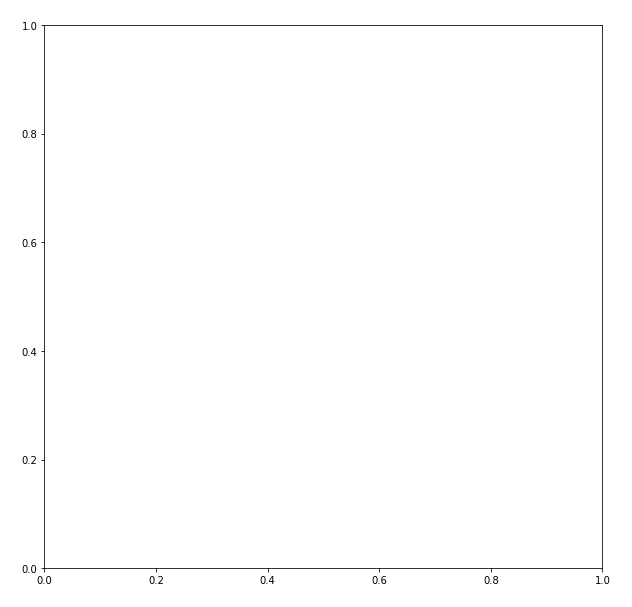

In [65]:
xintrp, yintrp = np.meshgrid(grid_lon, grid_lat)
fig, ax = plt.subplots(figsize=(10,10))
m = Basemap(llcrnrlon=lons.min()-0.1,llcrnrlat=lats.min()-0.1,urcrnrlon=lons.max()+0.1,urcrnrlat=lats.max()+0.1, projection='merc', resolution='h',area_thresh=1000.,ax=ax)